# Iris classification

### Datasource
https://archive.ics.uci.edu/ml/datasets/iris

### Description
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

![](https://www.w3resource.com/w3r_images/iris_flower_sepal_and_petal.png)

# Code

## Step 0. - display helper

In [2]:
from tabulate import tabulate
from IPython.display import HTML, display

def dispList(data):
    display(HTML(tabulate(data,tablefmt='html')))

## Step 1. - Load data

In [3]:
from sklearn import datasets # dataset
import pandas as pd  # python data analysis library
import numpy as np   # scientific computing (math)

# load data
iris_data = datasets.load_iris()

# connvert
iris_dataset = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

# display first n rows
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Step 2. - split data to attributes (X) and labels (Y)

In [4]:
X = iris_dataset.iloc[:,0:4]
Y = iris_dataset[['target']]

classes = Y.target.unique()
print(classes)

# 0 - setosa
# 1 - versicolor
# 2 - virgnica

[0. 1. 2.]


## Step 3. - split data to training set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

## Step 4. - feature scalling

In [6]:
from sklearn.preprocessing import StandardScaler

dispList(X_train[0:10])

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
dispList(X_train_scaled[0:10])

131,7.9,3.8,6.4,2
53,5.5,2.3,4,1.3
76,6.8,2.8,4.8,1.4
30,4.8,3.1,1.6,0.2
147,6.5,3,5.2,2
94,5.6,2.7,4.2,1.3
68,6.2,2.2,4.5,1.5
101,5.8,2.7,5.1,1.9
87,6.3,2.3,4.4,1.3
72,6.3,2.5,4.9,1.5


2.49229,1.65634,1.52173,1.0669
-0.407829,-1.67857,0.153456,0.13916
1.16307,-0.566935,0.609548,0.271694
-1.2537,0.100047,-1.21482,-1.31871
0.800553,-0.12228,0.837593,1.0669
-0.286991,-0.789262,0.267479,0.13916
0.438038,-1.9009,0.438513,0.404228
-0.0453143,-0.789262,0.780582,0.934362
0.558877,-1.67857,0.381502,0.13916
0.558877,-1.23392,0.666559,0.404228


## Step 5. - train model

In [11]:
from sklearn.neural_network import MLPClassifier

# another activation function: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Step 6. - prediction

In [8]:
predictions = mlp.predict(X_test)

## Step 7. - evaluating

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



| TP | FP |
|---|---|
| FN | TN |


![precision.png](img/precision.png)
![recall.png](img/recall.png)
![f1.png](img/f1.png)

## Step 8. - comparision to decision trees

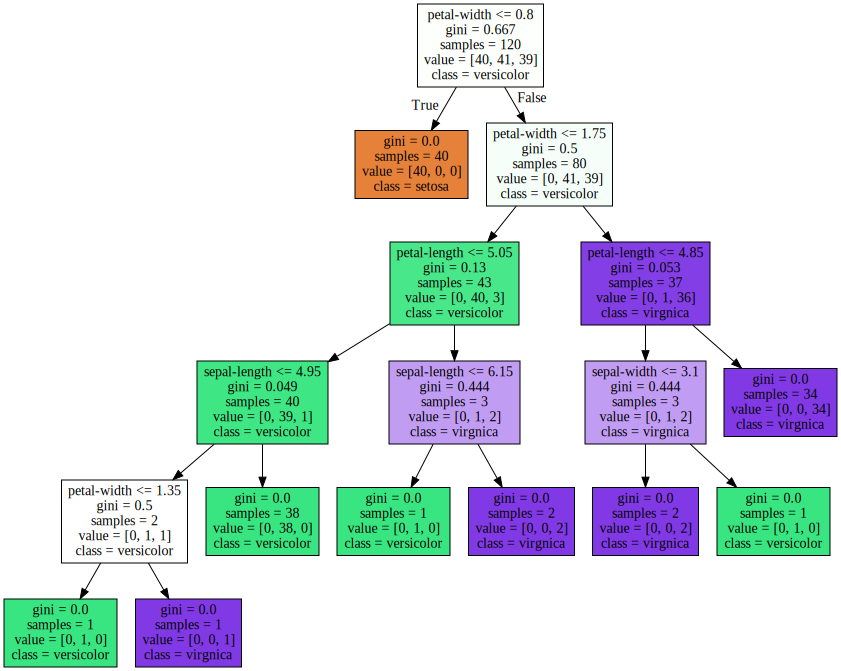

[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score



clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)

import sklearn
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(sklearn.tree.export_graphviz(clf, out_file=None
   , feature_names=['sepal-length','sepal-width','petal-length','petal-width'], class_names=['setosa', 'versicolor', 'virgnica'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

dt_predictions = clf.predict(X_test)

print(confusion_matrix(Y_test,dt_predictions))
print(classification_report(Y_test,dt_predictions))